# Softmax Regression

# A. Credit Card Fraud Detection

## 1.Tải bộ dữ liệu

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/MODULE05/data

/content/drive/MyDrive/Colab Notebooks/MODULE05/data


In [ ]:
#https://drive.google.com/file/d/1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4/view
!gdown 1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=540c3d8a-5107-4a51-8391-e979fe519d33
To: /content/drive/MyDrive/Colab Notebooks/MODULE05/data/creditcard.csv
100% 151M/151M [00:03<00:00, 45.4MB/s]


In [ ]:
cd ..

/content/drive/MyDrive/Colab Notebooks/MODULE05


## 2.Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

## 3.Đọc dữ liệu
Sử dụng thư viện pandas để đọc file .csv thành DataFrame

In [ ]:
dataset_path = 'data/creditcard.csv'
df = pd. read_csv (dataset_path)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

## 4.Tách biến X, y
Chuyển đổi DataFrame hiện tại thành array và tách hai biến X, y

In [ ]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:,:-1].astype(np.float64),dataset_arr[:,-1].astype(np.uint8)

In [ ]:
X.shape,y.shape

((284807, 30), (284807,))

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

## 5.Thêm bias vào X
Khi sử dụng thư viện, bias sẽ được thêm tự động vào X. Tuy nhiên, khi triển khai lại từ đầu, chúng ta cần phải tự thêm bias vào mỗi mẫu dữ liệu, nhằm thỏa mãn công thức hàm dự đoán

In [ ]:
intercept = np. ones ((X. shape [0] , 1))
X_b = np. concatenate (( intercept , X),axis =1)

In [ ]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
X.shape,X_b.shape

((284807, 30), (284807, 31))

## 6.One-hot encoding label
Đối với Softmax Regression, sau khi có biến chứa nhãn dữ liệu y, ta cần phải thay đổi cách biểu diễn giá trị của nhãn trước khi thực hiện tính toán. Cụ thể (giả định với bộ dữ liệu có 2 class), với dạng biểu diễn số nguyên ban đầu y = [0, 0, 1,...1], ta biến đổi thành các vector toàn giá trị 0 với số phần tử
bằng n_classes và gán bằng 1 tại vị trí chỉ mục theo giá trị tại nhãn ban đầu của mẫu dữ liệu tương ứng. Lúc này, ta sẽ được y_one_hot = [[1, 0], [1, 0], [0, 1],...[0, 1]].

In [ ]:
n_classes = np.unique(y, axis =0).shape[0]
n_samples = y.shape[0]
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## 7.Chia tập train, val, test
Sau khi đã hoàn chỉnh biến X, chúng ta tiến hành chia ba bộ train, val, test với tỉ lệ 7:2:1

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((199364, 31), (56962, 31), (28481, 31))

In [ ]:
y_train.shape,y_val.shape,y_test.shape

((199364, 2), (56962, 2), (28481, 2))

## 8.Chuẩn hóa dữ liệu
Ta sử dụng X_train vừa tạo ở bước trên fit vào hàm chuẩn hóa StandardScaler. Sau đó, đem scaler này chuẩn hóa cho tập X_val và X_test (lưu ý rằng ta không chuẩn hóa bias nên sẽ bỏ qua cột đầu tiên trong X)

In [ ]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

In [ ]:
X_train

array([[ 1.        , -0.68101315,  0.71447649, ...,  0.1019486 ,
         0.07410031, -0.29192049],
       [ 1.        ,  1.04720051,  1.0475128 , ..., -0.19095883,
        -0.09813199, -0.27780616],
       [ 1.        ,  1.54445364, -1.20352757, ...,  0.31391593,
         1.12488897, -0.34496952],
       ...,
       [ 1.        , -1.16327203, -0.46532359, ...,  0.05909871,
         0.15346218,  0.26375106],
       [ 1.        , -0.4253317 , -1.03971015, ...,  0.46421784,
        -0.36325231, -0.32624398],
       [ 1.        ,  1.49841793, -0.20953065, ...,  0.07337838,
         0.39953201, -0.24272082]])

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((199364, 31), (56962, 31), (28481, 31))

## 9.Cài đặt các hàm quan trọng
Để thuận tiện trong việc cài đặt chương trình, ta định nghĩa sẵn một số hàm sẽ được dùng trong quá trình huấn luyện mô hình

### Hàm softmax

In [ ]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z/exp_z.sum(axis=1)[:,None]

###Hàm Predict

In [ ]:
def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)
  return y_hat

### Hàm tính loss
Xây dựng hàm tính loss với công thức Cross-entropy

In [ ]:
def compute_loss(y_hat, y):
  n = y.size
  return (-1/n)*np.sum(y*np.log(y_hat))

### Hàm tính gradient

In [ ]:
def compute_gradient(X, y, y_hat):
  n = y.size
  return np.dot(X.T, (y_hat - y))/n

### Hàm Update trọng số theta
Áp dụng giải thuật Gradient Descent

In [ ]:
def update_theta(theta, gradient, lr):
  return (theta - lr*gradient)

### Hàm tính độ chính xác
vì kết quả dự đoán là một vector phân bố xác suất, ta sẽ sử dụng hàm argmax để đưa dự đoán về class ID có ước lượng xác suất cao nhất

In [ ]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis =1) == np.argmax(y, axis=1)).mean()
  return acc

## 10.Khai báo các siêu tham số và khởi tạo weights
Lưu ý rằng, với Softmax Regression, mỗi class sẽ có một bộ trọng số riêng ứng với các đặc trưng đầu vào (bao gồm cả bias). Vì vậy, ta cần khởi tạo trọng số θ với shape = (n_features, n_classes)

In [ ]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

## 11.Huấn luyện mô hình
Chúng ta sẽ triển khai quá trình huấn luyện mô hình sử dụng thuật toán Gradient Descent, với ý tưởng chính như sau:

Khởi tạo vòng lặp với số lần lặp bằng số epochs.

Với mỗi lần lặp, duyệt qua toàn bộ mẫu dữ liệu (trong training set) theo từng bộ mẫu dữ liệu có kích thước batch_size (tạm gọi là cặp X_i và y_i)

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    # dự đoán kết quả của mô hình với các mẫu dữ liệu tại batch đang xét
    y_hat = predict(X_i, theta)

    # Tính loss
    train_loss = compute_loss(y_hat, y_i)

    # Tính đạo hàm
    gradient = compute_gradient(X_i, y_i, y_hat)

    #cập nhật bộ trọng số theta
    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH{epoch+1}:\tTraining loss:{train_batch_loss:.3f}\tValidation loss:{val_batch_loss:.3f}')


EPOCH1:	Training loss:0.176	Validation loss:0.174

EPOCH2:	Training loss:0.115	Validation loss:0.113

EPOCH3:	Training loss:0.081	Validation loss:0.080

EPOCH4:	Training loss:0.062	Validation loss:0.061

EPOCH5:	Training loss:0.049	Validation loss:0.049

EPOCH6:	Training loss:0.041	Validation loss:0.041

EPOCH7:	Training loss:0.035	Validation loss:0.035

EPOCH8:	Training loss:0.031	Validation loss:0.031

EPOCH9:	Training loss:0.028	Validation loss:0.027

EPOCH10:	Training loss:0.025	Validation loss:0.025

EPOCH11:	Training loss:0.023	Validation loss:0.023

EPOCH12:	Training loss:0.021	Validation loss:0.021

EPOCH13:	Training loss:0.020	Validation loss:0.020

EPOCH14:	Training loss:0.019	Validation loss:0.018

EPOCH15:	Training loss:0.017	Validation loss:0.017

EPOCH16:	Training loss:0.017	Validation loss:0.016

EPOCH17:	Training loss:0.016	Validation loss:0.015

EPOCH18:	Training loss:0.015	Validation loss:0.015

EPOCH19:	Training loss:0.014	Validation loss:0.014

EPOCH20:	Training lo

## 12.Trực quan hóa kết quả huấn luyện lên đồ thị

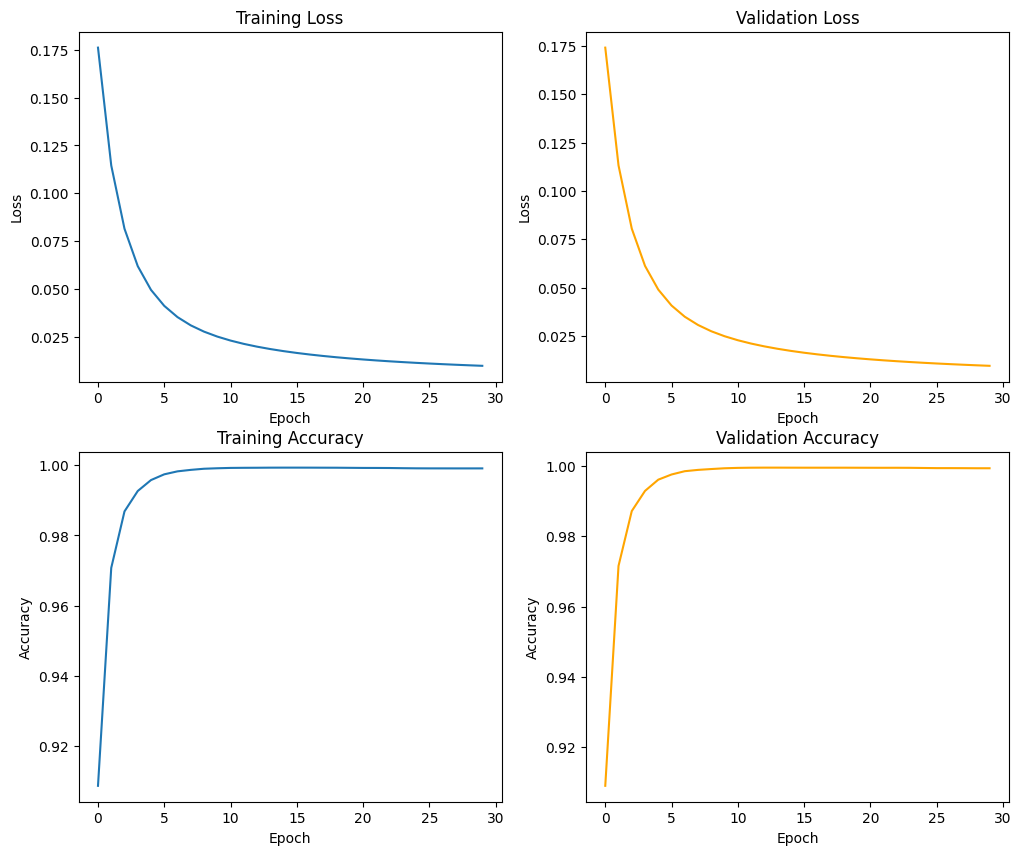

In [ ]:
#Hình ảnh trực quan kết quả huấn luyện trên tập train và val cho bài Card Fraud Detection
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')
ax[1, 1].plot(val_accs,'orange')
ax[1, 1].set( xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()

##13. Đánh giá mô hình
Sử dụng bộ trọng số mô hình tìm được sau quá trình huấn luyện, ta đánh giá độ chính xác của mô hình trên hai tập val và test

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy( X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Val Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Val Accuracy: 0.9992977774656788
Test Accuracy: 0.9992275552122467


#B. Twitter Sentiment Analysis

## 1.Tải bộ dữ liệu

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/MODULE05/data

/content/drive/MyDrive/Colab Notebooks/MODULE05/data


In [ ]:
# https://drive.google.com/file/d/1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt/view?usp=drive_link
!gdown 1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt

Downloading...
From: https://drive.google.com/uc?id=1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt
To: /content/drive/MyDrive/Colab Notebooks/MODULE05/data/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 120MB/s]


In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks/MODULE05


## 2. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 3. Đọc bộ dữ liệu
Sử dụng thư viện pandas để đọc file.csv thành DataFrame

In [ ]:
dataset_path = 'data/Twitter_Data.csv'
df = pd.read_csv(dataset_path)

In [ ]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df.shape

(162980, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## 4.Xóa missing
Bộ dữ liệu này có tồn tại một vài hàng chứa giá trị null

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


## 5.Tiền xử lý bộ dữ liệu
Dữ liệu đầu vào của chúng ta lúc này hiện đang ở dạng văn bản (string), chưa có đặc trưng rõ ràng cũng như không thể đưa vào huấn luyện mô hình được. Vì vậy, chúng ta sẽ tiền xử lý dữ liệu văn bản đầu vào để đưa về một dạng vector đặc trưng nào đó

### (a) Xây dựng hàm chuẩn hóa văn bản
Văn bản gốc có rất nhiều kí tự dư thừa, vô nghĩa... Vì vậy, ta cần loại bỏ chúng cũng như áp dụng thêm vài bước chuẩn hóa văn bản khác để văn bản đầu vào trở nên ít phức tạp hơn, nhằm tăng cường hiệu quả biểu diễn của vector đặc trưng sau này

In [ ]:
def text_normalize(text):
  # Lowercasing
  text = text.lower()

  # Retweet old acronym "RT" removal
  text = re.sub(r'^rt[\s]+', '', text)

  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\ r\n]*', '', text)

  # Punctuation removal
  text = re.sub(r'[^\w\s]', '', text)

  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  words = text.split()
  words = [word for word in words if word not in stop_words]
  text = ' '.join(words)

  # Stemming
  stemmer = SnowballStemmer('english')
  words = text.split()
  words = [stemmer.stem(word) for word in words]
  text = ' '.join(words)

  return text

### (b) Khởi tạo tf-idf vectorizer
Trong bài này, chúng ta sẽ sử dụng một dạng vector biểu diễn đặc trưng mới cho văn bản, đó là tf-idf

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(162969, 2000)

### (c) Thêm bias vào X

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X),axis=1)

In [ ]:
X_b.shape

(162969, 2001)

## 6.One-hot encoding label

In [ ]:
n_classes = df['category'].nunique()
n_samples = df['category'].size
y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [ ]:
y_encoded.shape

(162969, 3)

## 7.Chia tập train, val, test
Sau khi đã hoàn chỉnh biến X, chúng ta tiến hành chia ba bộ train, val, test với tỉ lệ 7:2:1

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
    )

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
    )

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((114078, 2001), (32594, 2001), (16297, 2001))

In [ ]:
y_train.shape,y_val.shape,y_test.shape

((114078, 3), (32594, 3), (16297, 3))

## 8.Cài đặt các hàm quan trọng
Sử dụng lại các hàm đã định nghĩa trong bài Card Fraud Detection

In [ ]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z/exp_z.sum(axis=1)[:, None]

def compute_loss(y_hat, y):
  n = y.size
  return (-1/n)*np.sum(y*np.log(y_hat))

def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)
  return y_hat

def compute_gradient(X, y, y_hat):
  n = y.size
  return np.dot(X.T, (y_hat-y))/n

def update_theta(theta, gradient, lr):
  return theta - lr*gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis =1) == np.argmax(y, axis=1)).mean()
  return acc

## 9.Khai báo các siêu tham số và khởi tạo weights
Trong bài này, vì số lượng mẫu dữ liệu là rất lớn, ta có thể cân nhắc tăng số batch size lên để tăng tốc độ huấn luyện (ví dụ ở đây ta cài batch_size=n_samples)

In [ ]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]
np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

## 10.Huấn luyện mô hình
Sử dụng code huấn luyện tương tự như bài Card Fraud
Detection

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    # dự đoán kết quả của mô hình với các mẫu dữ liệu tại batch đang xét
    y_hat = predict(X_i, theta)

    # Tính loss
    train_loss = compute_loss(y_hat, y_i)

    # Tính đạo hàm
    gradient = compute_gradient(X_i, y_i, y_hat)

    #cập nhật bộ trọng số theta
    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH{epoch+1}:\tTraining loss:{train_batch_loss:.3f}\tValidation loss:{val_batch_loss:.3f}')


EPOCH1:	Training loss:0.377	Validation loss:0.376

EPOCH2:	Training loss:0.377	Validation loss:0.376

EPOCH3:	Training loss:0.377	Validation loss:0.376

EPOCH4:	Training loss:0.376	Validation loss:0.375

EPOCH5:	Training loss:0.376	Validation loss:0.375

EPOCH6:	Training loss:0.376	Validation loss:0.375

EPOCH7:	Training loss:0.375	Validation loss:0.374

EPOCH8:	Training loss:0.375	Validation loss:0.374

EPOCH9:	Training loss:0.375	Validation loss:0.374

EPOCH10:	Training loss:0.374	Validation loss:0.373

EPOCH11:	Training loss:0.374	Validation loss:0.373

EPOCH12:	Training loss:0.374	Validation loss:0.373

EPOCH13:	Training loss:0.374	Validation loss:0.373

EPOCH14:	Training loss:0.373	Validation loss:0.372

EPOCH15:	Training loss:0.373	Validation loss:0.372

EPOCH16:	Training loss:0.373	Validation loss:0.372

EPOCH17:	Training loss:0.372	Validation loss:0.372

EPOCH18:	Training loss:0.372	Validation loss:0.371

EPOCH19:	Training loss:0.372	Validation loss:0.371

EPOCH20:	Training lo

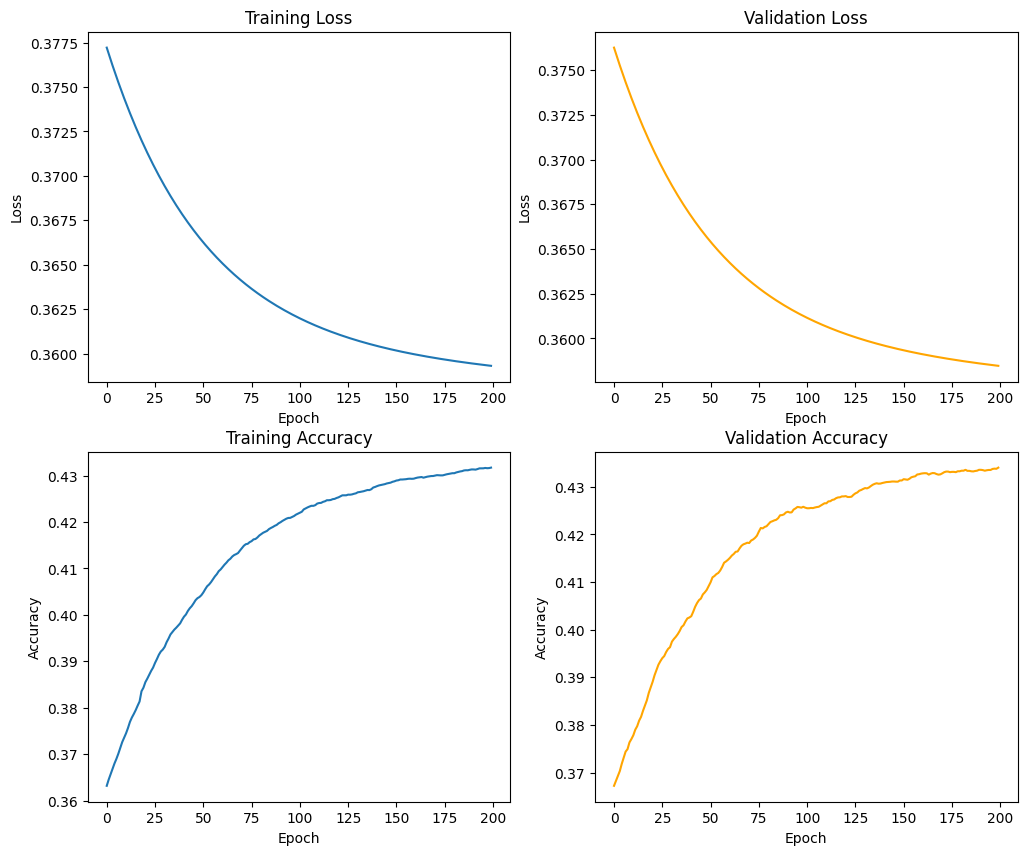

In [ ]:
#Hình ảnh trực quan kết quả huấn luyện trên tập train và val cho bài Card Fraud Detection
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')
ax[1, 1].plot(val_accs,'orange')
ax[1, 1].set( xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()

## 11.Đánh giá mô hình

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy:{val_set_acc}')
print(f'Accuracy:{test_set_acc}')

Evaluation on validation and test set:
Accuracy:0.4340369393139842
Accuracy:0.4322881511934712
